# Deep Neural Network

<font color="black"> SAMANTHA MICHAEL     </font>

## Data Preparation

Data was prepared in the EDA notebook. Please see (01_EDA.ipynb) for a detailed explaintion of the process.

#### Imports

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import random
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("GPU Details:", tf.config.list_physical_devices('GPU'))
print("TF version:", tf.__version__)

Num GPUs Available:  1
GPU Details: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TF version: 2.18.0


#### Reproducibility
It is crucial to set random seeds ahead of any random operations. A simple function to set all necessary seeds is provided.

In [42]:
def set_seeds(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
set_seeds(42)

#### Loading Data
Importing the feature matrix and target vector as numpy arrays (X,y) in standard float32 format

In [43]:
# loading the resampled numpy arrays from the EDA notebook and ensuring consistent format
X = np.load('X_smote.npy').astype('float32') ## if running locally - adjust the path data/X_smote.npy
y = np.load('y_smote.npy').astype('float32') ## if running locally - adjust the path data/y_smote.npy

#### Viewing Data Shape

In [44]:
print("Array type:", type(X))
print("Array shape:", X.shape)
print("Data type:", X.dtype)
print(X[:5])

Array type: <class 'numpy.ndarray'>
Array shape: (504324, 95)
Data type: float32
[[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.

In [45]:
print("Array type:", type(y))
print("Array shape:", y.shape)
print("Data type:", y.dtype)
print(y[:5])

Array type: <class 'numpy.ndarray'>
Array shape: (504324,)
Data type: float32
[5. 5. 3. 5. 5.]


#### Loading the Saved Encoder to View the Label Encodings in the Target Array

In [46]:
## if running in colab make sure to import the label_encoder.pkl file from the EDA notebook
from sklearn.preprocessing import LabelEncoder
import pickle

# load the encoder
with open('label_encoder.pkl', 'rb') as file:
    le = pickle.load(file)

# view mapping
print("Class mapping:")
for i, label in enumerate(le.classes_):
    print(f"{i}: {label}")

Class mapping:
0: CHUSKA
1: CIBOLA
2: KAYENTA
3: MESA V BLANDING
4: MESA V CAHONE
5: MESA V DOLORES
6: MESA V SAN JUAN
7: MESA V SANDSTONE
8: QRTZ SAND IND


#### Splitting the Data into Test and Train Sets

In [47]:
n_samples = X.shape[0]
indices = np.arange(n_samples)
train_idx = np.random.choice(indices, size=int(0.8 * n_samples), replace=False)

# handling the numpy array with masking
test_mask = np.ones(n_samples, dtype=bool)
test_mask[train_idx] = False
test_idx = indices[test_mask]

# splitting using numpy indexing
x_train = X[train_idx]
x_test = X[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]

print(f'x train shape: {x_train.shape}')
print(f'x test shape: {x_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

x train shape: (403459, 95)
x test shape: (100865, 95)
y train shape: (403459,)
y test shape: (100865,)


In [48]:
display(x_train)
display(x_test)
display(y_train)
display(y_test)

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

array([3., 6., 5., ..., 5., 8., 1.], dtype=float32)

array([5., 3., 3., ..., 8., 8., 8.], dtype=float32)

#### Scaling
Since the data were all categorical and have been encoded, there is no need for normalization. However, let's check the mean and standard deviation to be sure.

In [49]:
data = {'X': X, 'y': y}

for name, array in data.items():
    print(f"\n{name} Statistics:")
    print("-" * 10)

    # Stack mean and std for each array
    stats = np.vstack([
        np.mean(array, axis=0),
        np.std(array, axis=0)
    ]).T

    # header
    print(f"{'Feature':<8} {'Mean':>12} {'Std':>12}")
    print("-" * 10)

    # print statistics
    if name == 'X':
        for i, (mean, std) in enumerate(stats):
            print(f"{i:<8} {mean:>12.2f} {std:>12.2f}")
    else:
        for i, (mean, std) in enumerate(stats):
            print(f"{i:<8} {mean:>12.2f} {std:>12.2f}")


X Statistics:
----------
Feature          Mean          Std
----------
0                0.82         0.38
1                0.12         0.33
2                0.03         0.18
3                0.00         0.01
4                0.00         0.01
5                0.01         0.10
6                0.19         0.39
7                0.00         0.04
8                0.06         0.23
9                0.00         0.00
10               0.08         0.28
11               0.03         0.16
12               0.00         0.04
13               0.00         0.00
14               0.00         0.00
15               0.00         0.00
16               0.00         0.02
17               0.00         0.01
18               0.03         0.17
19               0.00         0.05
20               0.05         0.23
21               0.21         0.41
22               0.02         0.14
23               0.01         0.11
24               0.00         0.01
25               0.01         0.07
26               0

##### Observation
Everthing looks good and the data is ready for modeling.

# Method
Multiclass pottery classification deep neural network consisting of:

* Input Layer: 95 input neurons each corresponding to the encoded features

* Hidden Layers: 64 neurons with ReLU activation introducing non linearity and mitigating vanishing gradient problem

* Output Layer: 9 output neurons with softmax activation for multiclass classification

* He Weight Initialization: used for hidden layer weights and implemented to ensure smooth training process with ReLU activation

* Learning Rate Schedule: learning rate decay helps model converge more smoothly

* Regularization: L2 weight decay added to hidden layer to prevent overfitting

* Optimization: Adaptive Moment Esitmation (Adam) optimizer automatically adjusts learning rates for each parameter

* Early Stopping with Checkpointing: stops the model training if the validation loss does not improve with a patience of 10 epochs. implemented to prevent overfitting



#### Model Class Definition
* Multilayer Perceptron (MLP) - simple yet effective neural network for multi-class classification.
* Chosen for its ability to capture non linear relationships in the features and target variables in the pottery classification data.


He Normalization Initialization:
* Specifically designed for layers with ReLU activation
* Helps prevent vanishing/exploding gradient problems
* Initializes hidden layer weights with a variance scaled to the number of input units

L2 Weight Decay:
* Adds a penalty for large weights to the loss function
* Helps prevent overfitting
* Keeps model weights small and more generalized

Techniques were chosen to:

* Stabilize initial training
* Prevent model from becoming too complex
* Improve overall generalization performance

In [50]:
class PotteryClassifier(keras.Model):
    """ Multilayer Perceptron class

        attributes
        ===========
        net     Sequential
                network built with keras.Sequential
    """

    def __init__(self, X, n_output, n_hidden, activ='relu'):
        super().__init__()

        self.net = keras.Sequential([
            keras.Input(shape=(95,)),
            keras.layers.Dense(n_hidden,
                               activation=activ,
                               kernel_initializer= 'he_normal', # he weight initialization for our relu activation
                               kernel_regularizer=keras.regularizers.l2(0.001) # l2 regularization - weight decay
                               ),
            keras.layers.Dense(n_output, activation='softmax')
        ])

        self.net.summary()


    def call(self, input):
        x = self.net(input)
        return x

#### Applying Learning Rate Decay
* Gradually reduces the learning rate during training
* Helps the model converge more precisely
* Allows larger steps early in training, smaller steps later

In [51]:
initial_learning_rate = 0.01
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100,  # adjust this as needed
    decay_rate=0.9,
    staircase=True
)

#### Building the Model

In [52]:
model = PotteryClassifier(x_train, n_hidden=64, n_output=9)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,729 (26.29 KB)

 Trainable params: 6,729 (26.29 KB)

 Non-trainable params: 0 (0.00 B)

#### Compiling the Model, Implementing Early Stopping & Checkpointing
The model was compiled with the Adam optimizer, sparse categorical crossentropy loss function, and accuracy metric to prepare the neural network for multiclass classification training.

Implemented early stopping with model checkpointing to prevent overfitting and preserve the best model configuration during training, allowing the model to halt when validation performance plateaus and retain the optimal weights.

Adam optimization was chosen to:

* Automatically adjust learning rates for each parameter
* Help handle different scales of parameters more effectively
* Combine benefits of momentum and adaptive learning rates
* Enable faster convergence and is more smooth compared to standard gradient descent

In [53]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.01),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']

)

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    min_delta=0.001  # min change to qualify as an improvement
)

model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='./models/best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)

# Experiments

#### Model Hyperparameters and Training Configuration
Hyperparameters:
* Epochs: 500 epochs selected to provide sufficient training time
* Batch Size: 256 chosen for computational efficiency and gradient stability
* Validation Split: 0.2 to ensure robust model evaluation

Early Stopping:
* 10 epoch patience
* Monitors validation loss
* Prevents unnecessary computational expense

Optimization:
* Adam optimizer with 0.01 initial learning rate and exponential decay

#### Rationale for Architectural Choices & Hyperparameter Selection

Batch Size (256)
* Balances computational efficiency with gradient information quality, providing a robust update mechanism.

Validation Split (0.2)
* Ensures model generalizability by reserving sufficient data for performance evaluation.

Early Stopping
* Mitigates overfitting by halting training when performance plateaus, identifying the optimal model configuration.

Learning Rate Decay
* Enables fine-tuned convergence by allowing adaptive learning rate adjustments.


#### Training the Model

The model was trained over 500 epochs with early stopping and model checkpointing to prevent overfitting and maintain optimal performance. The training process balanced model learning with validation performance.

In [54]:
## deleting the old model file in case it exists
import os

if os.path.exists('/content/best_model.keras'):
    os.remove('/content/best_model.keras')

history = model.fit(
    x_train,
    y_train,
    epochs=500,
    batch_size=256,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping, model_checkpoint]
)

model.save('/content/models/final_pottery_classifier.keras', overwrite=True)

Epoch 1/500
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9604 - loss: 0.2216 - val_accuracy: 0.9890 - val_loss: 0.0684
Epoch 2/500
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9894 - loss: 0.0630 - val_accuracy: 0.9907 - val_loss: 0.0558
Epoch 3/500
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9901 - loss: 0.0569 - val_accuracy: 0.9915 - val_loss: 0.0511
Epoch 4/500
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9903 - loss: 0.0533 - val_accuracy: 0.9921 - val_loss: 0.0485
Epoch 5/500
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9906 - loss: 0.0507 - val_accuracy: 0.9908 - val_loss: 0.0493
Epoch 6/500
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9908 - loss: 0.0487 - val_accuracy: 0.9921 - val_loss: 0.0478
Epoch 7/500
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9909 - loss: 0.0478 - val_accuracy: 0.9922 - val_loss: 0.0467
Epoch 8/500
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9912 - loss: 0

##### Observation
The model stopped training after 33 epochs, much earlier than expected. However, the Accuracy for Train and Validation are around ~99.17% which is great and the loss around ~0.041

#### Plotting Training & Validation Losses & Accuracy

In [55]:
def plot_learning(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

  # accuracy plot
  ax1.plot(history.history['accuracy'], label='Training Accuracy')
  ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
  ax1.set_title('Model Accuracy')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Accuracy')
  ax1.legend()

  # loss plot
  ax2.plot(history.history['loss'], label='Training Loss')
  ax2.plot(history.history['val_loss'], label='Validation Loss')
  ax2.set_title('Model Loss')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Loss')
  ax2.legend()

  plt.tight_layout()

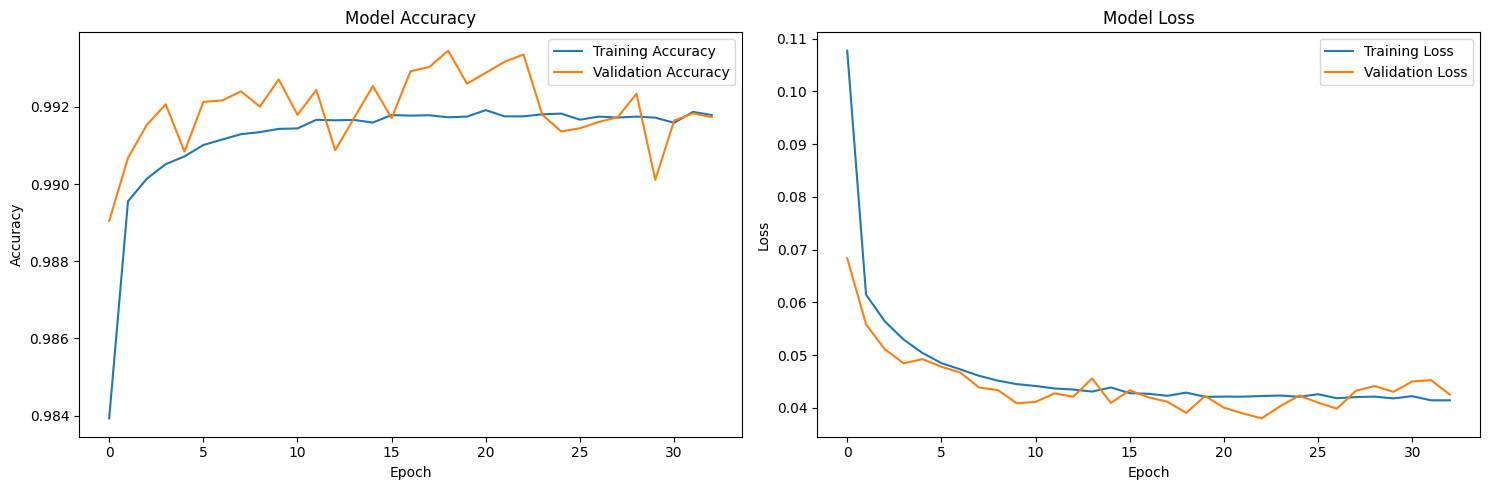

In [56]:
plot_learning(history)

##### Observations
Model Accuracy Graph:

* Training Accuracy (blue):
    * Quickly reaches around 0.989
    * Remains very stable throughout training


* Validation Accuracy (orange):
    * More fluctuation
    * Hovers around 0.990, with some minor ups and downs

Both lines converge very quickly, indicating good model learning
_____________________________________________________________
Model Loss Graph:

* Training Loss (blue):
    * Drops rapidly in the first few epochs
    * Quickly stabilizes at a low value


Validation Loss (orange):
* Also drops quickly
* Stabilizes with slight fluctuations

The convergence of training and validation loss suggests the model is not overfitting
______________________________________________________________
##### Interpretation

* Rapid Initial Learning: The model learns very quickly in the first few epochs
* Stable Performance: Both accuracy and loss remain consistent after initial training
* No Signs of Overfitting: Training and validation curves are close to each other
* High Overall Performance: Accuracy around 0.99 indicates excellent model performance

The graphs suggest the model has found a good representation of the data and generalizes well to unseen data.

#### Model Evaluation

In [57]:
model.evaluate(x_test, y_test)

3153/3153 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9950 - loss: 0.0339


[0.03758595883846283, 0.9930897951126099]

The model achieved good results:
* Loss: 0.0376 - very low, indicating good model performance
* Accuracy: 99.31% accuracy on the test set

Interpretation:
* Low loss value suggests the model is making very confident and accurate predictions
* Nearly 99.3% accuracy indicates excellent generalization to unseen data
* The model performs consistently with the validation metrics

#### Making Predictions

In [58]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

with open('label_encoder.pkl', 'rb') as file:
    le = pickle.load(file)
y_pred_cultural = le.inverse_transform(y_pred_classes)

predictions_df = pd.DataFrame(
    y_pred,
    columns=[f'Prob_{class_name}' for class_name in le.classes_]
)

3153/3153 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [59]:
print(predictions_df)

         Prob_CHUSKA   Prob_CIBOLA  Prob_KAYENTA  Prob_MESA V BLANDING  \
0       3.922552e-06  2.373625e-08  1.149828e-13          1.633177e-10   
1       1.195385e-07  1.433009e-07  3.920935e-07          9.999989e-01   
2       1.195385e-07  1.433009e-07  3.920935e-07          9.999989e-01   
3       2.907976e-08  1.457362e-06  2.957578e-14          2.288541e-10   
4       3.922552e-06  2.373625e-08  1.149828e-13          1.633177e-10   
...              ...           ...           ...                   ...   
100860  1.856146e-05  2.247336e-06  3.255753e-08          1.155795e-16   
100861  1.549345e-04  1.326983e-04  1.304688e-07          1.216412e-14   
100862  1.856146e-05  2.247336e-06  3.255753e-08          1.155795e-16   
100863  1.856146e-05  2.247336e-06  3.255753e-08          1.155795e-16   
100864  1.847158e-05  2.227627e-06  3.205540e-08          1.119522e-16   

        Prob_MESA V CAHONE  Prob_MESA V DOLORES  Prob_MESA V SAN JUAN  \
0             1.395725e-05         9.9

#### Visualization

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'CHUSKA'),
  Text(1.5, 0, 'CIBOLA'),
  Text(2.5, 0, 'KAYENTA'),
  Text(3.5, 0, 'MESA V BLANDING'),
  Text(4.5, 0, 'MESA V CAHONE'),
  Text(5.5, 0, 'MESA V DOLORES'),
  Text(6.5, 0, 'MESA V SAN JUAN'),
  Text(7.5, 0, 'MESA V SANDSTONE'),
  Text(8.5, 0, 'QRTZ SAND IND')])

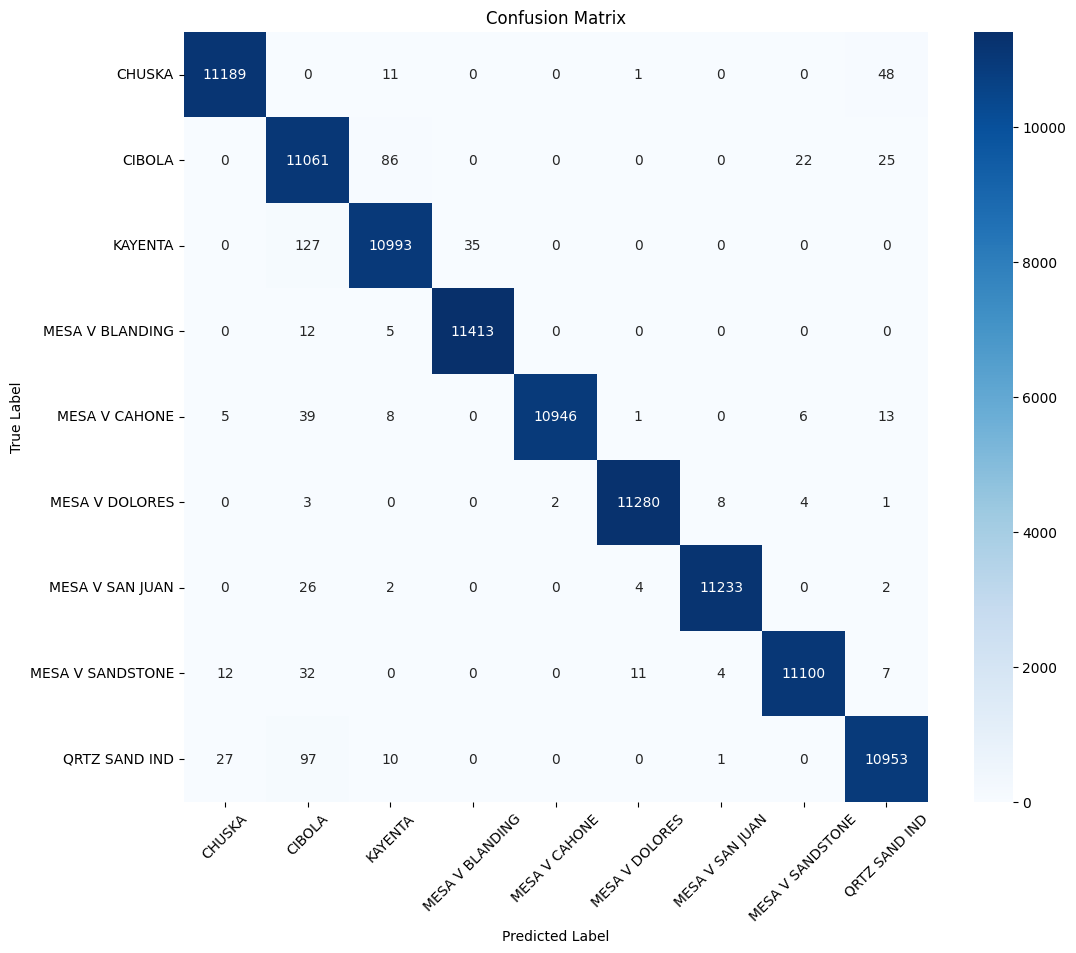

In [60]:
from sklearn.metrics import confusion_matrix

# confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)

The diagonal values (dark blue color) represent correctly classified instances for each class
Off-diagonal values (light blue) show misclassifications between classes

Correct Classifications:
* CHUSKA: 11,189 correct predictions
* CIBOLA: 11,061 correct predictions
* KAYENTA: 10,993 correct predictions
* MESA V BLANDING: 11,413 correct predictions
* MESA V CAHONE: 10,946 correct predictions
* MESA V DOLORES: 11,280 correct predictions
* MESA V SAN JUAN: 11,233 correct predictions
* MESA V SANDSTONE: 11,100 correct predictions
* ORTZ SAND IND: 10,953 correct predictions

Misclassifications:

Most misclassifications are relatively low
* CHUSKA and ORTZ SAND IND (49 misclassifications)
* CIBOLA and KAYENTA (86 misclassifications)
* A few other small cross-class predictions

Interpretation

The matrix confirms the high accuracy and shows

* Consistent performance across all classes
* Very few misclassifications
* No systematic bias towards misclassifying any particular pair of classes

#### Classification Report

In [61]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_classes,
                             target_names=le.classes_,
                             output_dict=True)

report_df = pd.DataFrame(report).transpose()
print(report_df.round(3))

                  precision  recall  f1-score     support
CHUSKA                0.996   0.995     0.995   11249.000
CIBOLA                0.971   0.988     0.979   11194.000
KAYENTA               0.989   0.985     0.987   11155.000
MESA V BLANDING       0.997   0.999     0.998   11430.000
MESA V CAHONE         1.000   0.993     0.997   11018.000
MESA V DOLORES        0.998   0.998     0.998   11298.000
MESA V SAN JUAN       0.999   0.997     0.998   11267.000
MESA V SANDSTONE      0.997   0.994     0.996   11166.000
QRTZ SAND IND         0.991   0.988     0.990   11088.000
accuracy              0.993   0.993     0.993       0.993
macro avg             0.993   0.993     0.993  100865.000
weighted avg          0.993   0.993     0.993  100865.000


Precision: The ratio of correctly predicted positive observations to the total predicted positive observations for each class.
* Most classes have very high precision, ranging from 0.896 to 1.000
This means when the model predicts a specific class, it's highly likely to be correct

Recall: The ratio of correctly predicted positive observations to all observations in the actual class.

* Recall is also consistently high, ranging from 0.985 to 0.998
* This indicates the model is very good at identifying most instances of each class

F1-Score: The harmonic mean of precision and recall, providing a single score that balances both metrics.

* All classes have F1-scores between 0.995 and 0.998
* This suggests excellent performance across all classes

Support: The number of actual occurrences of each class in the test set.

* Varies from around 11,000 to 11,250 samples per class
* Relatively balanced dataset

Overall Metrics:

* Accuracy: 0.993 (99.3% correct predictions)
* Macro average: 0.993
* Weighted average: 0.993

The model appears to be performing exceptionally well across all classes, with nearly perfect precision, recall, and F1-scores. This suggests:

* The features are highly discriminative
* The model architecture is well-suited to the problem

# Conclusions

Key Learnings:

* Implemented advanced regularization techniques like He weight initialization and L2 regularization
* Gained insights into preventing overfitting through strategic model design
* Developed a robust neural network achieving 99.31% accuracy in pottery classification

Challenges:

* Conducting thorough data exploration and preparation for a complex archaeological dataset
* Managing categorical variable encoding to ensure model readiness
* Designing neural network architecture to effectively capture dataset nuances
* Understanding nuanced differences between weight decay and learning rate decay


Future Considerations:

* Explore advanced feature engineering
* Investigate ensemble methods for potential performance improvements

# References

Google. (2024). TensorFlow 2.18.0: Machine learning platform [Software]. https://www.tensorflow.org

Digital Archaeological Record. (1988). Ceramics: Temporal-Spatial Dataset (tDAR id: 6039). https://doi.org/10.6067/XCV8TD9WNB